In [1]:
from os import listdir
import pandas as pd
import re
import numpy as np
from os.path import join
from statistics import median
from statistics import mean

In [2]:
fp = open("../data/qrels-treceval-clinical_trials-2018-v2.txt", "r")
lines = fp.readlines()

In [3]:
nctIdsDictGoldStandard = {}
for line in lines:
    qNo = int(line.split()[0])
    nctId = line.split()[2]
    rel = int(line.split()[3])
    
    if qNo in nctIdsDictGoldStandard:
        nctIdsDictGoldStandard[qNo][nctId] = rel
    else:
        newD = {}
        newD[nctId] = rel
        nctIdsDictGoldStandard[qNo] = newD

In [4]:
nctIdsDictGoldStandard.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [5]:
for key1 in nctIdsDictGoldStandard.keys():
    count_0 = 0
    count_1 = 0
    count_2 = 0
    for key2 in nctIdsDictGoldStandard[key1].keys():
        if nctIdsDictGoldStandard[key1][key2] == 0:
            count_0 += 1
        if nctIdsDictGoldStandard[key1][key2] == 1:
            count_1 += 1
        if nctIdsDictGoldStandard[key1][key2] == 2:
            count_2 += 1
    print(count_2, count_1, count_0, count_2 + count_1 + count_0)

50 60 97 207
19 107 73 199
45 78 95 218
1 46 189 236
96 24 104 224
46 73 86 205
0 118 118 236
14 13 160 187
2 14 175 191
0 25 206 231
5 18 187 210
0 24 201 225
2 25 207 234
9 21 201 231
0 15 299 314
1 0 288 289
10 16 364 390
0 33 368 401
27 5 373 405
0 4 441 445
2 64 285 351
16 27 323 366
0 26 294 320
0 1 385 386
2 2 351 355
37 0 183 220
12 13 129 154
6 3 188 197
40 51 252 343
19 3 214 236
7 4 358 369
48 7 288 343
38 36 294 368
3 2 281 286
2 2 368 372
27 10 331 368
51 14 381 446
2 9 162 173
6 11 171 188
131 6 173 310
2 12 203 217
4 1 375 380
8 2 241 251
0 106 224 330
12 11 217 240
13 5 311 329
32 15 219 266
4 12 208 224
2 0 286 288
20 0 214 234


In [6]:
files = listdir("../data/pageRank2QueriesOurMethod")
numberList = []
for file in files:
    numberList.append(int(re.findall('\d+', file )[0]))
print(numberList)
print(np.argsort(numberList))

[35, 9, 23, 26, 33, 37, 16, 31, 42, 10, 27, 15, 45, 20, 39, 48, 18, 13, 2, 32, 7, 4, 6, 46, 36, 17, 41, 30, 34, 29, 49, 12, 47, 24, 40, 21, 22, 5, 11, 25, 3, 44, 14, 8, 28, 0, 38, 43, 19, 1]
[45 49 18 40 21 37 22 20 43  1  9 38 31 17 42 11  6 25 16 48 13 35 36  2
 33 39  3 10 44 29 27  7 19  4 28  0 24  5 46 14 34 26  8 47 41 12 23 32
 15 30]


In [7]:
i = 1
count_0_list = []
count_1_list = []
count_2_list = []
precisionList = []
precisionAvgList = []
for index in np.argsort(numberList):
    j = 0
    print(files[index])
    df = pd.read_csv(join("../data", "pageRank2QueriesOurMethod", files[index]))
#     print(df.columns)
    df = df.sort_values(by=['page_rank_score_brief_title_summary_combined'], ascending=False)
#     print(df['page_rank_score_brief_title_summary_combined'].head())
    count_0 = 0
    count_1 = 0
    count_2 = 0
    
    totScore = 0
    for row in range(df.shape[0])[:10]:
        nct = df.iloc[row, 0]
        score = df.iloc[row, 3]
#         print(nct, score)
        try:
            rel = nctIdsDictGoldStandard[i][nct]
        except:
            rel = 0
        
        if rel == 0:
            count_0 += 1
        elif rel == 1:
            count_1 += 1
        elif rel == 2:
            count_2 += 1
        totScore += rel
        precisionList.append(rel)
        j += 1
    precisionAvgList.append(totScore/j)
        
    count_0_list.append(count_0)
    count_1_list.append(count_1)
    count_2_list.append(count_2)
    print(count_2, count_1, count_0)
    print()
    i += 1

0melanoma_pageRank.csv
0 1 9

1melanoma_pageRank.csv
0 1 9

2melanoma_pageRank.csv
1 0 9

3melanoma_pageRank.csv
0 0 10

4melanoma_pageRank.csv
1 0 9

5melanoma_pageRank.csv
0 1 9

6melanoma_pageRank.csv
0 1 9

7melanoma_pageRank.csv
0 0 10

8melanoma_pageRank.csv
0 0 10

9melanoma_pageRank.csv
0 0 10

10melanoma_pageRank.csv
0 0 10

11melanoma_pageRank.csv
0 0 10

12melanoma_pageRank.csv
0 0 10

13melanoma_pageRank.csv
0 0 10

14melanoma_pageRank.csv
0 0 10

15melanoma_pageRank.csv
0 0 10

16melanoma_pageRank.csv
0 0 10

17melanoma_pageRank.csv
0 0 10

18melanoma_pageRank.csv
0 0 10

19melanoma_pageRank.csv
0 0 10

20melanoma_pageRank.csv
0 0 10

21melanoma_pageRank.csv
0 0 10

22melanoma_pageRank.csv
0 0 10

23melanoma_pageRank.csv
0 0 10

24melanoma_pageRank.csv
0 0 10

25colorectal cancer_pageRank.csv
0 0 10

26medullary thyroid carcinoma_pageRank.csv
3 0 7

27neuroblastoma_pageRank.csv
0 0 10

28esophageal cancer_pageRank.csv
0 0 3

29lung cancer_pageRank.csv
0 0 10

30head and ne

In [8]:
avg = 0
for item in precisionAvgList:
    avg += item
print(avg/50)

0.04800000000000001


In [9]:
precisionList

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [10]:
tot_count_0 = 0
tot_count_1 = 0
tot_count_2 = 0
for index in range(len(count_0_list)):
    tot_count_0 += count_0_list[index]
    tot_count_1 += count_1_list[index]
    tot_count_2 += count_2_list[index]
print("Total:", tot_count_2, tot_count_1, tot_count_0)

Total: 10 4 461


In [11]:
print("Mean:", mean(count_2_list), mean(count_1_list), mean(count_0_list))

Mean: 0.2 0.08 9.22


In [12]:
print("Median:", median(count_2_list), median(count_1_list), median(count_0_list))

Median: 0.0 0.0 10.0


In [13]:
print("Max:", max(count_2_list), max(count_1_list), max(count_0_list))

Max: 4 1 10


In [14]:
print("Min:", min(count_2_list), min(count_1_list), min(count_0_list))

Min: 0 0 1


In [15]:
tot_retrieved_results_list = []
for index in np.argsort(numberList):
#     print(files[index])
    df = pd.read_csv(join("../data", "pageRank2QueriesOurMethod", files[index]))
    tot_retrieved_results_list.append(df.shape[0])

In [16]:
count = 0
for item in tot_retrieved_results_list:
    if item>1000:
        count += 1
print("Total Topics:", len(tot_retrieved_results_list))
print("Total Topics having results greater than 1000:", count)

Total Topics: 50
Total Topics having results greater than 1000: 7


In [17]:
i = 1
count_0_list = []
count_1_list = []
count_2_list = []

ac_count_1_list = []
ac_count_2_list = []
precisionList = []
precisionAvgList = []
relevantList = []
for index in np.argsort(numberList):
    j = 0
    print(files[index])
    df = pd.read_csv(join("../data", "pageRank2QueriesOurMethod", files[index]))
#     print(df.columns)
    df = df.sort_values(by=['page_rank_score_brief_title_summary_combined'], ascending=False)
#     print(df['page_rank_score_brief_title_summary_combined'].head())
    count_0 = 0
    count_1 = 0
    count_2 = 0
    
    totScore = 0
    
    defRelAc = 0
    parRelAc = 0
    notRelAc = 0
    
    for nct in nctIdsDictGoldStandard[i]:
        if nctIdsDictGoldStandard[i][nct] == 2:
            defRelAc += 1 
        elif nctIdsDictGoldStandard[i][nct] == 1:
            parRelAc += 1
        elif nctIdsDictGoldStandard[i][nct] == 0:
            notRelAc += 1
    
    ac_count_1_list.append(parRelAc)
    ac_count_2_list.append(defRelAc)
    
    for row in range(df.shape[0])[:1000]:
        nct = df.iloc[row, 0]
        score = df.iloc[row, 3]
#         print(nct, score)
        try:
            rel = nctIdsDictGoldStandard[i][nct]
        except:
            rel = 0
        
        if rel == 0:
            count_0 += 1
        elif rel == 1:
            count_1 += 1
        elif rel == 2:
            count_2 += 1
        totScore += rel
        precisionList.append(rel)
        j += 1
    precisionAvgList.append(totScore/j)
    
    relevantList.append(count_1+count_2)
    
    
    count_0_list.append(count_0)
    count_1_list.append(count_1)
    count_2_list.append(count_2)
    print(count_2, "(" + str(defRelAc) + ")",  count_1, "(" + str(parRelAc) + ")", count_0, "(" + str(notRelAc) + ")" )
    print()
    i += 1

0melanoma_pageRank.csv
29 (50) 32 (60) 848 (97)

1melanoma_pageRank.csv
16 (19) 54 (107) 839 (73)

2melanoma_pageRank.csv
27 (45) 43 (78) 839 (95)

3melanoma_pageRank.csv
1 (1) 21 (46) 886 (189)

4melanoma_pageRank.csv
65 (96) 4 (24) 840 (104)

5melanoma_pageRank.csv
30 (46) 36 (73) 843 (86)

6melanoma_pageRank.csv
0 (0) 61 (118) 848 (118)

7melanoma_pageRank.csv
9 (14) 2 (13) 902 (160)

8melanoma_pageRank.csv
2 (2) 6 (14) 904 (175)

9melanoma_pageRank.csv
0 (0) 17 (25) 896 (206)

10melanoma_pageRank.csv
4 (5) 11 (18) 898 (187)

11melanoma_pageRank.csv
0 (0) 15 (24) 898 (201)

12melanoma_pageRank.csv
2 (2) 15 (25) 895 (207)

13melanoma_pageRank.csv
5 (9) 13 (21) 895 (201)

14melanoma_pageRank.csv
0 (0) 11 (15) 898 (299)

15melanoma_pageRank.csv
1 (1) 0 (0) 908 (288)

16melanoma_pageRank.csv
5 (10) 0 (16) 904 (364)

17melanoma_pageRank.csv
0 (0) 16 (33) 897 (368)

18melanoma_pageRank.csv
17 (27) 2 (5) 890 (373)

19melanoma_pageRank.csv
0 (0) 1 (4) 912 (441)

20melanoma_pageRank.csv
1 (2

In [18]:
import matplotlib.pyplot as plt
from statistics import mean, median

In [19]:
median_ac_rel = median(ac_count_2_list)
median_ac_rel

6.5

In [20]:
median_coctr_rel = median(count_2_list)
median_coctr_rel

2.0

In [21]:
xList = range(1, 51)
xList1 = [float(x)-0.4 for x in xList]
xList2 = [float(x) for x in xList]

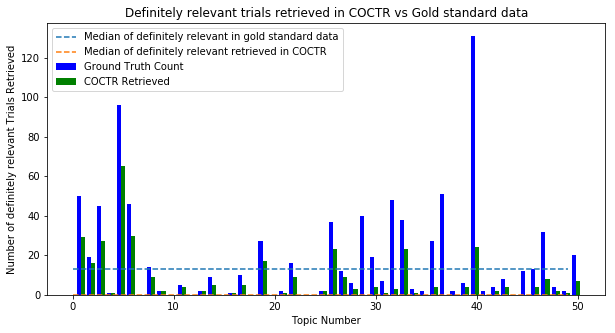

In [25]:
plt.figure(figsize=(10,5))
plt.title("Definitely relevant trials retrieved in COCTR vs Gold standard data")
plt.xlabel("Topic Number")
plt.ylabel("Number of definitely relevant Trials Retrieved")
plt.bar(xList1, ac_count_2_list,width=0.4,color='b',align='center', label="Ground Truth Count")
plt.bar(xList2, count_2_list,width=0.4,color='g',align='center', label="COCTR Retrieved")
plt.plot(50*[median_ac_rel], "--", label="Median of definitely relevant in gold standard data")
plt.plot(50*[median_coctr_rel], "--", label="Median of definitely relevant retrieved in COCTR")
# plt.plot()
plt.legend(loc="best")
plt.savefig("Definately_retrieved_COCTR.png", format="png", dpi=100)
plt.show()

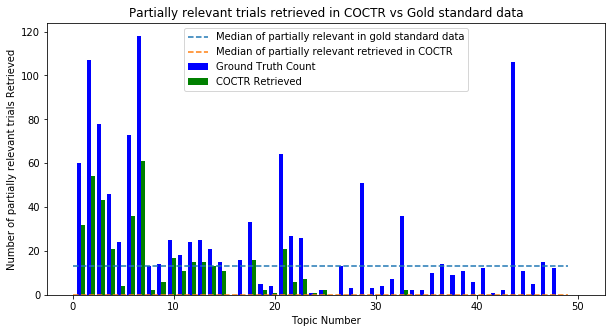

In [26]:
median_ac_rel = median(ac_count_1_list)
median_ac_rel

median_coctr_rel = median(count_1_list)
median_coctr_rel

xList = range(1, 51)
xList1 = [float(x)-0.4 for x in xList]
xList2 = [float(x) for x in xList]

plt.figure(figsize=(10,5))
plt.title("Partially relevant trials retrieved in COCTR vs Gold standard data")
plt.xlabel("Topic Number")
plt.ylabel("Number of partially relevant trials Retrieved")
plt.bar(xList1, ac_count_1_list,width=0.4,color='b',align='center', label="Ground Truth Count")
plt.bar(xList2, count_1_list,width=0.4,color='g',align='center', label="COCTR Retrieved")
plt.plot(50*[median_ac_rel], "--", label="Median of partially relevant in gold standard data")
plt.plot(50*[median_coctr_rel], "--", label="Median of partially relevant retrieved in COCTR")
# plt.plot()
plt.legend(loc="best")
plt.savefig("Partially_retrieved_COCTR.png", format="png", dpi=100)
plt.show()

In [54]:
len(relevantList)

50

In [32]:
i = 1
count_0_list = []
count_1_list = []
count_2_list = []
precisionList = []
precisionAvgList = []
for index in np.argsort(numberList):
    j = 0
    print(files[index])
    df = pd.read_csv(join("../data", "pageRank2QueriesOurMethod", files[index]))
#     print(df.columns)
    df = df.sort_values(by=['page_rank_score_brief_title_summary_combined'], ascending=False)
#     print(df['page_rank_score_brief_title_summary_combined'].head())
    count_0 = 0
    count_1 = 0
    count_2 = 0
    
    totScore = 0
    for row in range(df.shape[0])[:1000]:
        nct = df.iloc[row, 0]
        score = df.iloc[row, 3]
#         print(nct, score)
        try:
            rel = nctIdsDictGoldStandard[i][nct]
        except:
            rel = 0
        
        if rel == 0:
            count_0 += 1
        elif rel == 1:
            count_1 += 1
        elif rel == 2:
            count_2 += 1
        totScore += rel
        precisionList.append(rel)
        j += 1
        if j == relevantList[i-1]:
            precisionAvgList.append(totScore/j)
            break
    
    count_0_list.append(count_0)
    count_1_list.append(count_1)
    count_2_list.append(count_2)
    print(count_0, count_1, count_2)
    print()
    i += 1

0melanoma_pageRank.csv
59 1 1

1melanoma_pageRank.csv
66 4 0

2melanoma_pageRank.csv
66 1 3

3melanoma_pageRank.csv
22 0 0

4melanoma_pageRank.csv
66 0 3

5melanoma_pageRank.csv
63 2 1

6melanoma_pageRank.csv
57 4 0

7melanoma_pageRank.csv
11 0 0

8melanoma_pageRank.csv
8 0 0

9melanoma_pageRank.csv
17 0 0

10melanoma_pageRank.csv
15 0 0

11melanoma_pageRank.csv
15 0 0

12melanoma_pageRank.csv
17 0 0

13melanoma_pageRank.csv
18 0 0

14melanoma_pageRank.csv
11 0 0

15melanoma_pageRank.csv
1 0 0

16melanoma_pageRank.csv
5 0 0

17melanoma_pageRank.csv
16 0 0

18melanoma_pageRank.csv
19 0 0

19melanoma_pageRank.csv
1 0 0

20melanoma_pageRank.csv
22 0 0

21melanoma_pageRank.csv
15 0 0

22melanoma_pageRank.csv
7 0 0

23melanoma_pageRank.csv
1 0 0

24melanoma_pageRank.csv
4 0 0

25colorectal cancer_pageRank.csv
22 0 1

26medullary thyroid carcinoma_pageRank.csv
6 0 3

27neuroblastoma_pageRank.csv
3 0 0

28esophageal cancer_pageRank.csv
3 0 0

29lung cancer_pageRank.csv
4 0 0

30head and neck 

In [34]:
sum = 0
for item in precisionAvgList:
    sum += item
print(sum/50)

0.03506165452509002
